<a href="https://colab.research.google.com/github/up1054393/Theoria_apofasewn/blob/main/basic_code%2BKai%20alloi%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [5]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/Dataset1.csv')

In [6]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


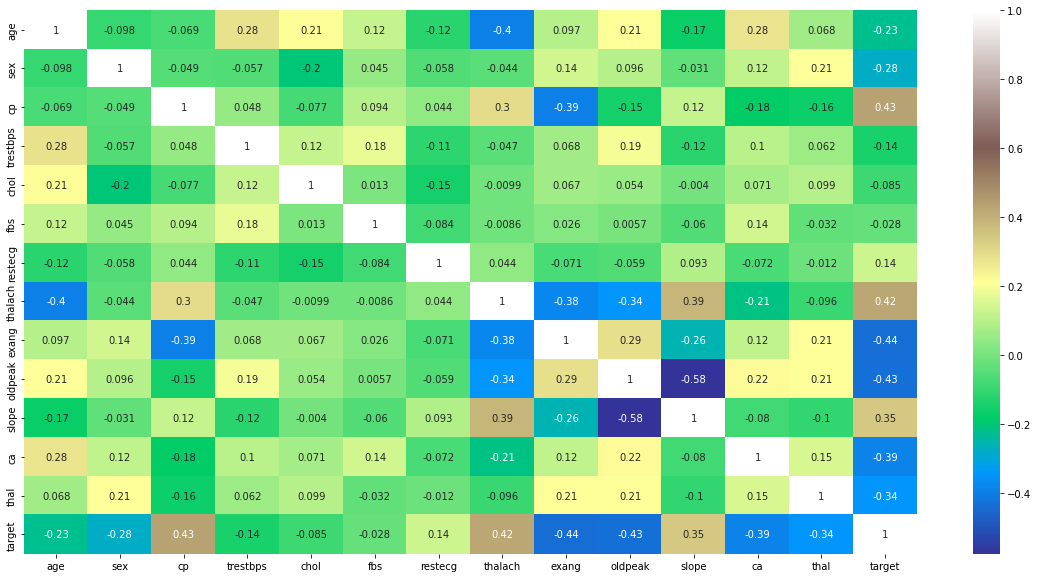

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(heart_data.corr(), annot=True, cmap='terrain')

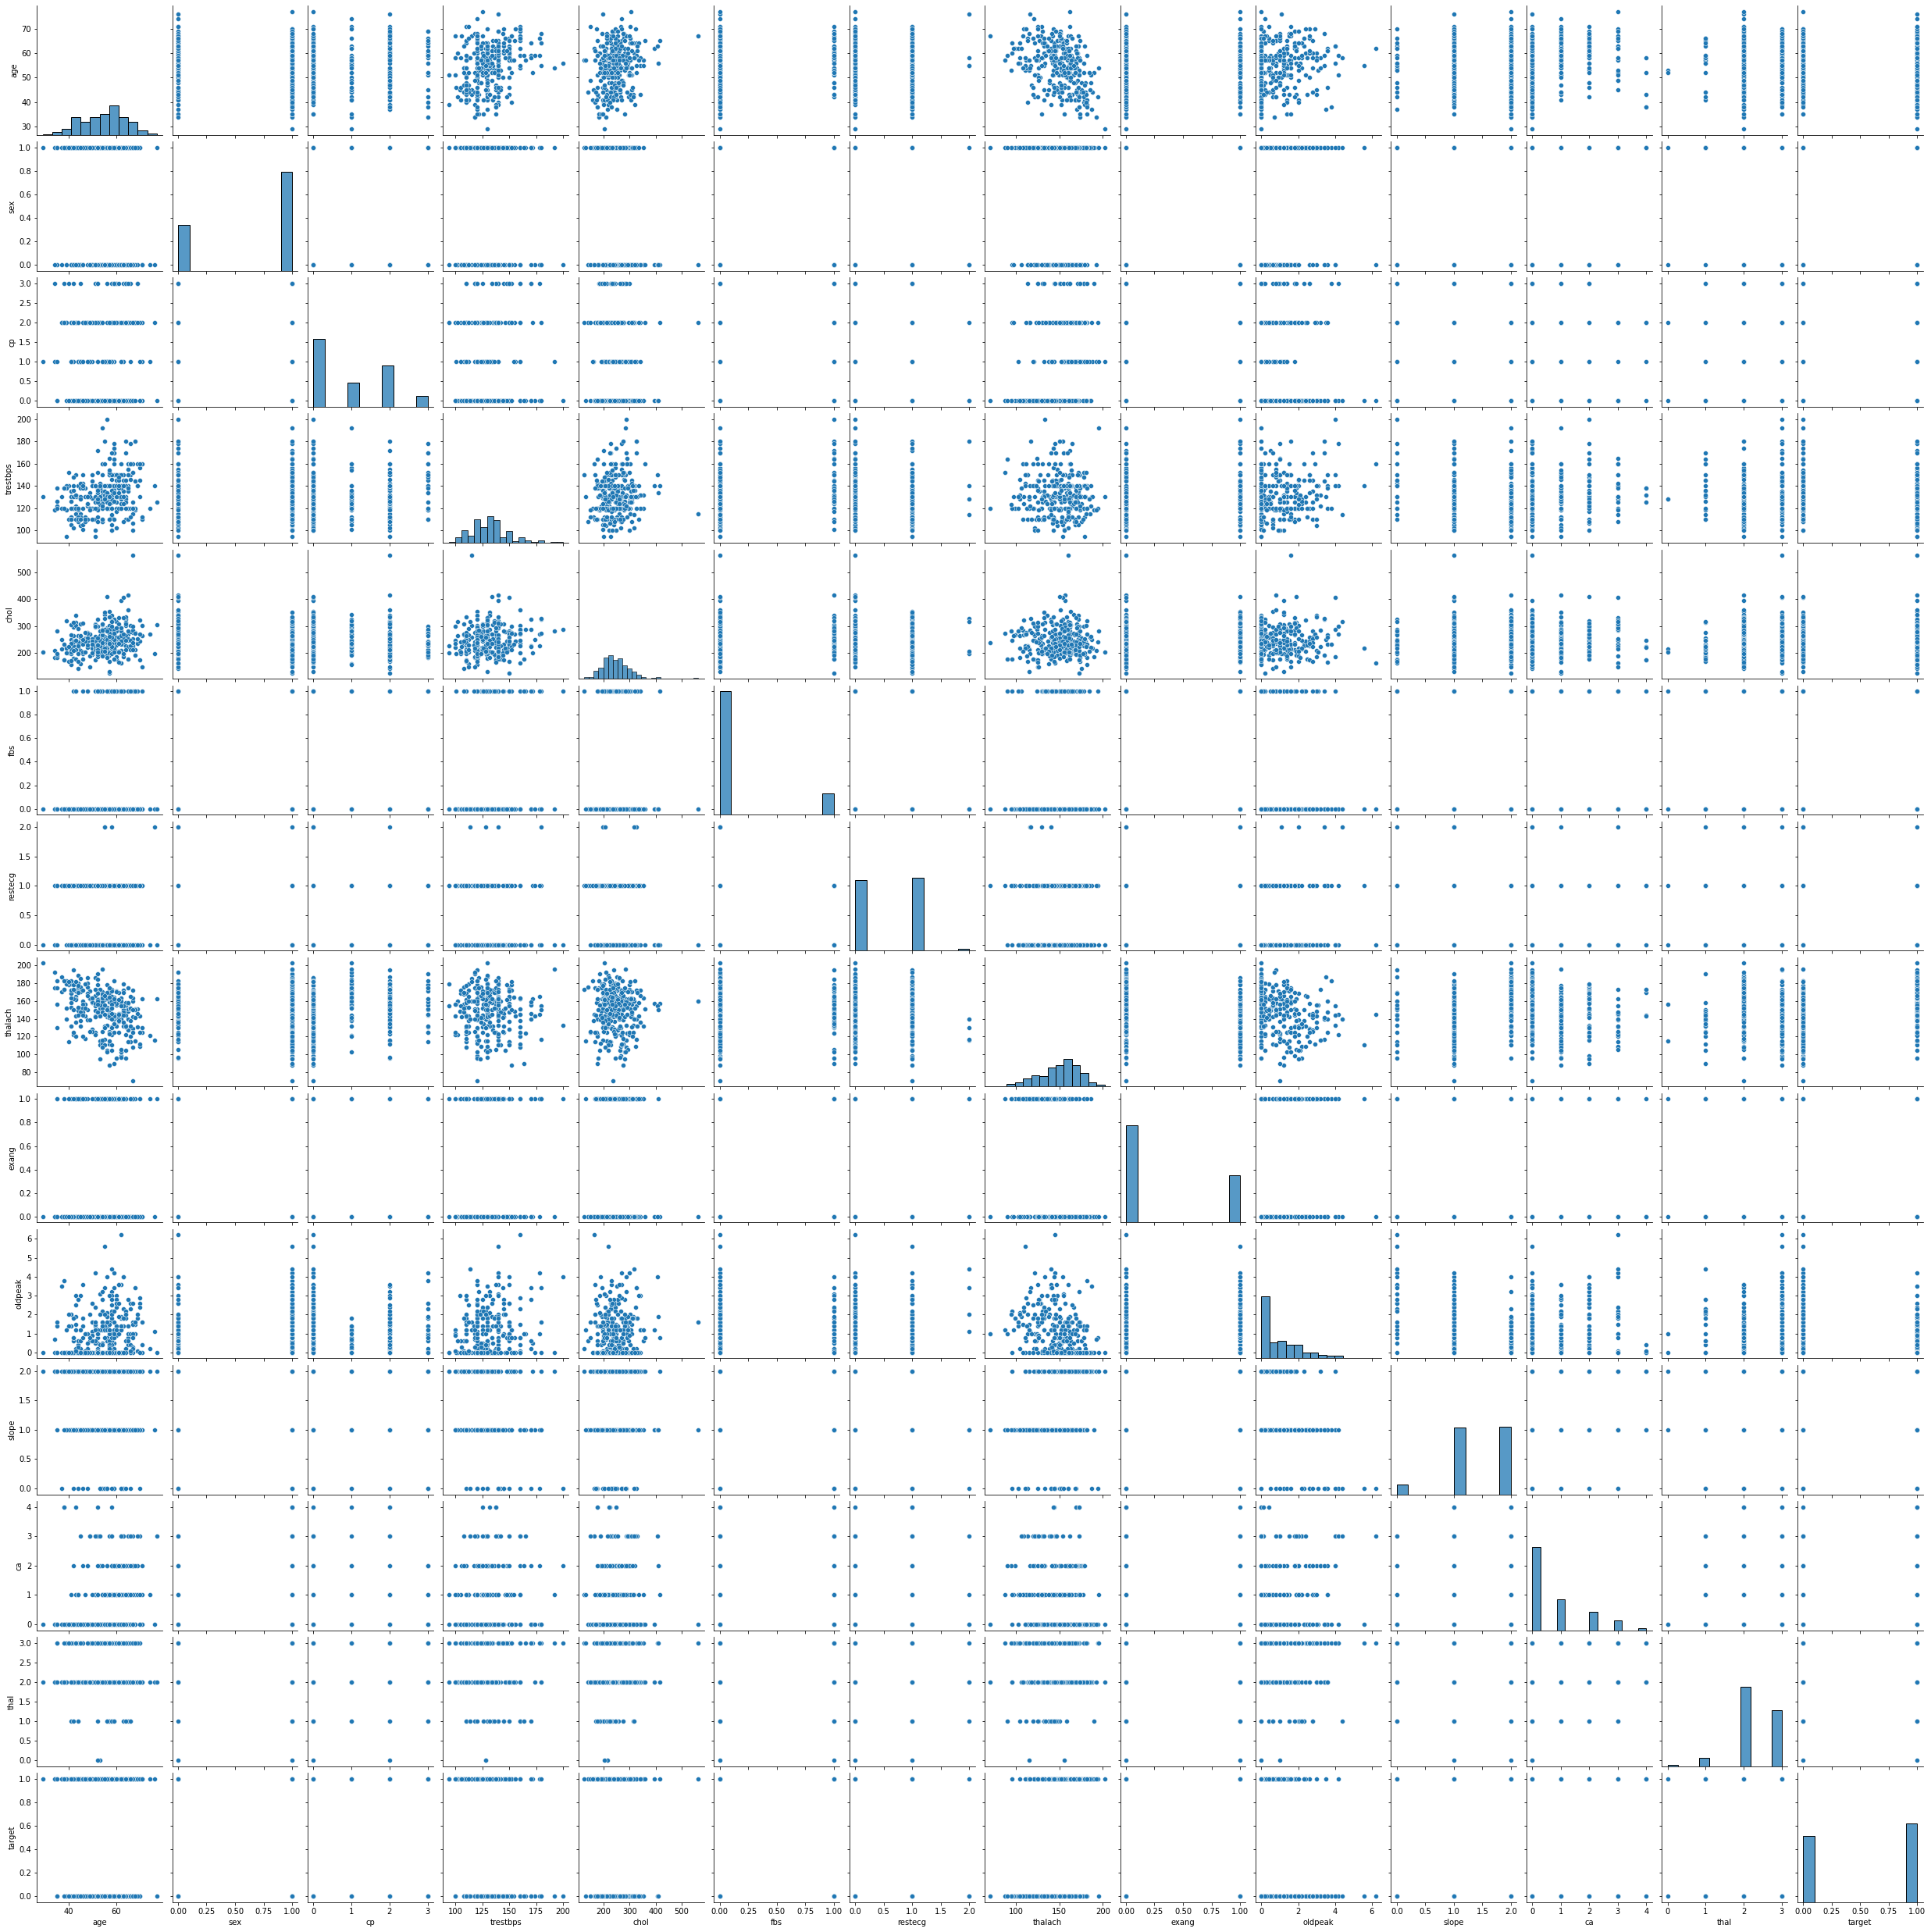

In [10]:
sns.pairplot(data=heart_data)

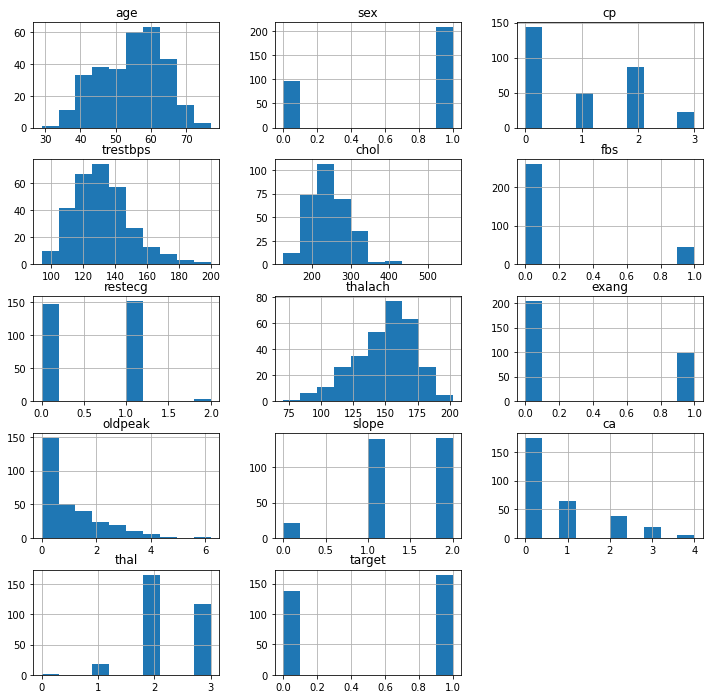

In [11]:
heart_data.hist(figsize=(12,12), layout=(5,3));

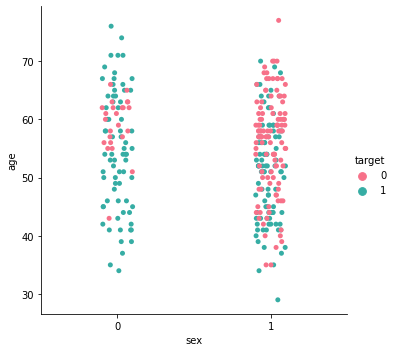

In [13]:
sns.catplot(data=heart_data, x='sex', y='age',  hue='target', palette='husl')

In [14]:
heart_data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [16]:
heart_data['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [12]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [26]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [27]:
print(X)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]


In [28]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


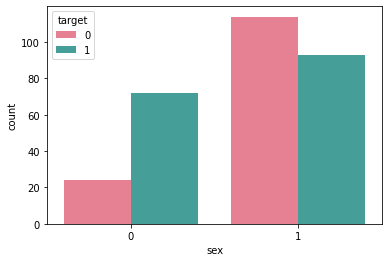

In [17]:
sns.countplot(x='sex', data=heart_data, palette='husl', hue='target')

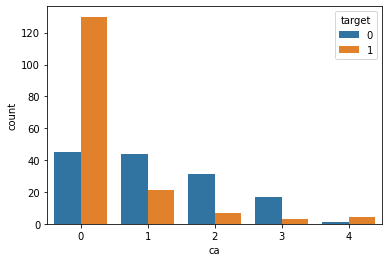

In [18]:
sns.countplot(x='ca',hue='target',data=heart_data)

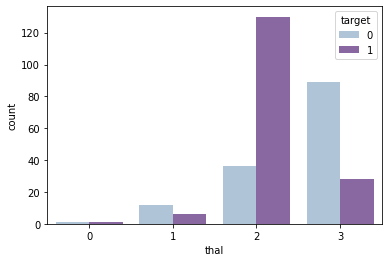

In [19]:
sns.countplot(x='thal',data=heart_data, hue='target', palette='BuPu' )

Splitting the Data into Training data & Test Data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Model Training

Logistic Regression

In [31]:
model = LogisticRegression()

In [32]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [33]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8512396694214877


In [34]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


Building a Predictive System

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


ΑΛΛΟΙ ML ΑΛΓΟΡΙΘΜΟΙ

ΑΡΚΕΤΟΣ ΕΞΤΡΑ ΚΩΔΙΚΑΣ, ΔΕΝ ΘΑ ΤΟΝ ΚΑΤΗΓΟΡΟΙΟΠΟΙΗΣΩ ΣΕ DATA ANALYSIS, SPLITTING DATA , TRAINING MODEL KLP .

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
heart_data[columns_to_scale] = StandardScaler.fit_transform(heart_data[columns_to_scale])

In [40]:
X= heart_data.drop(['target'], axis=1)
y= heart_data['target']

In [41]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [43]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[36,  4],
       [ 3, 48]])

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.9230769230769231

DECISION TREE

ΨΑΧΝΩ ΝΑ ΒΡΩ ΤΟ ACCURACY TOU DECISION TREE

In [47]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)

In [48]:
cm2

array([[30, 10],
       [15, 36]])

In [49]:
accuracy_score(y_test,prediction2)

0.7252747252747253

RANDOM FOREST

ΨΑΧΝΩ ΝΑ ΒΡΩ ΤΟ ACCURACY TOU RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

array([[34,  6],
       [ 8, 43]])

In [51]:
accuracy_score(y_test, prediction3)

0.8461538461538461

Το accuracy score απο πάνω είναι του confusion matrix

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svm=SVC()
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)

In [53]:
cm4

array([[33,  7],
       [ 2, 49]])

In [54]:
accuracy_score(y_test, prediction4)

0.9010989010989011

In [55]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
model5 = NB.fit(X_train, y_train)
prediction5 = model5.predict(X_test)
cm5= confusion_matrix(y_test, prediction5)

In [56]:
cm5

array([[35,  5],
       [ 6, 45]])

In [57]:
accuracy_score(y_test, prediction5)

0.8791208791208791

In [58]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
model6 = KNN.fit(X_train, y_train)
prediction6 = model6.predict(X_test)
cm6= confusion_matrix(y_test, prediction5)
cm6


array([[35,  5],
       [ 6, 45]])

In [59]:
print('KNN :', accuracy_score(y_test, prediction6))
print('lr :', accuracy_score(y_test, prediction1))
print('dtc :', accuracy_score(y_test, prediction2))
print('rfc :', accuracy_score(y_test, prediction3))
print('NB: ', accuracy_score(y_test, prediction4))
print('SVC :', accuracy_score(y_test, prediction5))

KNN : 0.8351648351648352
lr : 0.9230769230769231
dtc : 0.7252747252747253
rfc : 0.8461538461538461
NB:  0.9010989010989011
SVC : 0.8791208791208791


Best accuracy is given by Logistic Regression : 92
followed by NB and Decision tree : 90